Using the same data set and results that you were working with in the pandas action items section (Day 4), create a
* scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
* histogram of the log of the average total savings.
* line plot of the total jobs created for each month.

## Scatter plot of jobs created versus average savings

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(rc = {'figure.figsize':(15,8)})

df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')
df_nta = pd.read_csv('output.csv')
#print(df.dtypes)

In [29]:
df.shape

(450, 26)

In [30]:
sum(df['Job created']>0)

11

In [31]:
sum(df['Total Savings']>0)

444

In [32]:
#plt.scatter('Job created','Total Savings', data = df)

In [33]:
df_nta.head()

,NTA,Mean Total Savings,Total Jobs Created
0,Battery Park City-Lower Manhattan,469890.796667,0.0
1,Bushwick South,26140.455000,10.0
2,Carroll Gardens-Columbia Street-Red Hook,24337.390000,0.0
3,College Point,17159.372857,2.0
4,Crown Heights North,4036.298889,0.0


In [34]:
df_nta.shape

(20, 3)

## Standard scale scatter plot

(Assuming here that we're supposed to work with the aggregated-by-NTA-data rather than the original raw data

<AxesSubplot:xlabel='Total Jobs Created', ylabel='Mean Total Savings'>

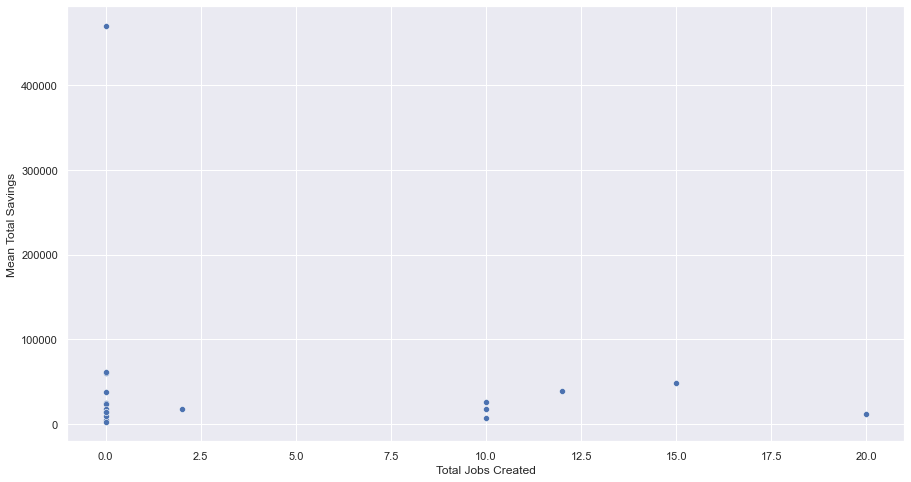

In [35]:
sns.scatterplot(x='Total Jobs Created',y='Mean Total Savings',data=df_nta)

## Log scale scatter plot

[None]

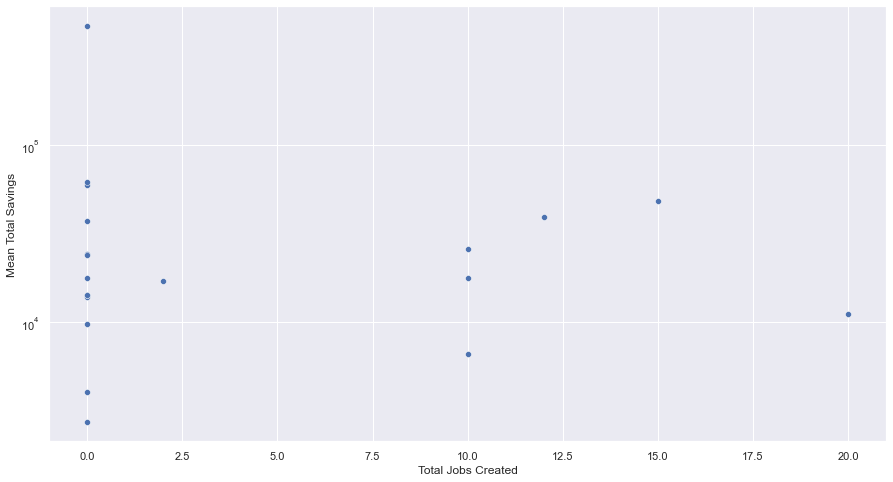

In [36]:
sns.scatterplot(x='Total Jobs Created',y='Mean Total Savings',data=df_nta).set(yscale="log")

## Histogram of the log of the average total savings.

Text(0.5, 0, 'Log of Mean Total Savings')

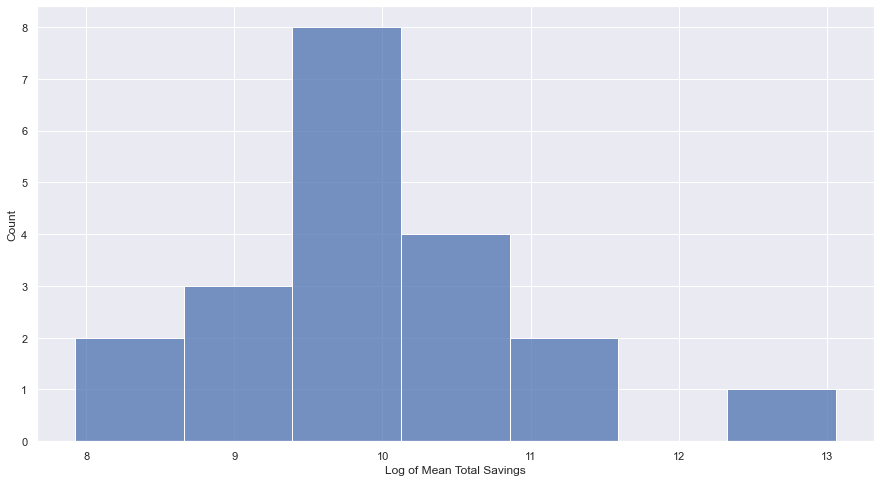

In [75]:
import math
log_mean_savings = list(map(math.log, df_nta['Mean Total Savings']))
sns.histplot(log_mean_savings).set_xlabel("Log of Mean Total Savings")


## Line plot of total jobs created by month

First requires some data manipulation

In [52]:
# Convert "Effective Date" string to date format
df['Effective Date'] = pd.to_datetime(df['Effective Date'])

In [53]:
df.dtypes

Company Name                                         object
company contact                                      object
company email                                        object
company phone                                        object
Address                                              object
City                                                 object
State                                                object
Postcode                                              int64
Industry                                             object
Industry descr                                       object
Company Type                                         object
Current fulltime                                    float64
Job created                                         float64
Job retain                                          float64
Effective Date                               datetime64[ns]
Total Savings                                       float64
Savings from beginning receiving benefit

In [111]:
df['Month'] = df['Effective Date'].apply(lambda x: x.month)

In [112]:
monthly_jobs = df[['Month','Job created']].groupby('Month').sum()
monthly_jobs

,Job created
Month,
1,0.0
2,27.0
3,20.0
4,2.0
5,2.0
6,63.0
7,20.0
8,0.0
9,0.0


<bound method _make_class_factory.<locals>.class_factory.<locals>.subcls.set of <AxesSubplot:xlabel='Month', ylabel='Job created'>>

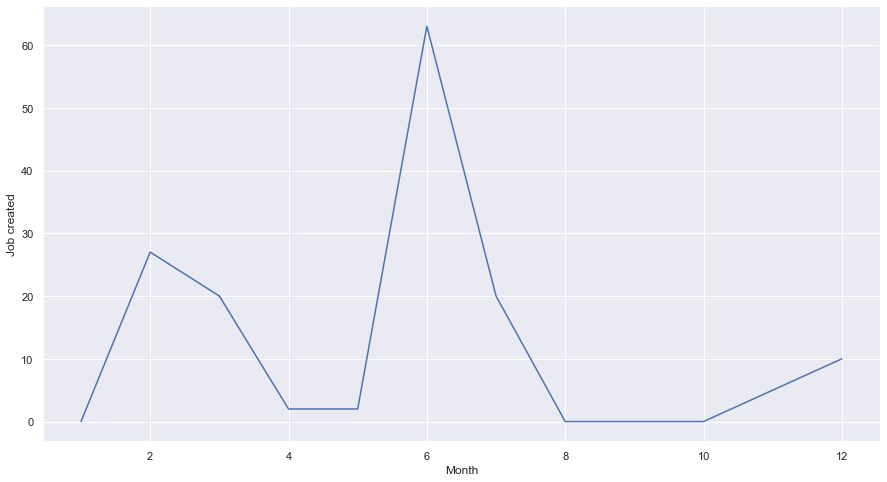

In [113]:
sns.lineplot(x=monthly_jobs.index, y='Job created', data=monthly_jobs).set